In [1]:
# ignoring warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## Data loading & Preprocessing

In [3]:
# Load MNIST
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
# Normalize (scale pixel values to 0–1)
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# For baseline ML: flatten 28x28 images to 784 features
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

## Baseline Model 

Logistic Regression Accuracy: 0.9263


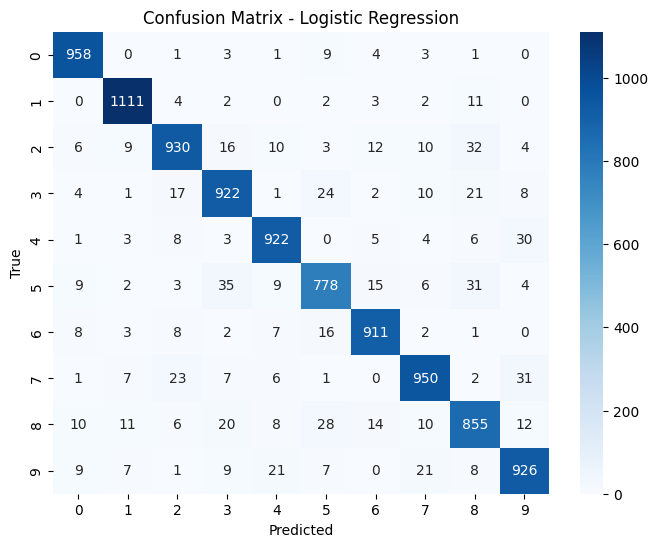

In [5]:
# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_flat, y_train)

# Predictions
y_pred = log_reg.predict(X_test_flat)

# Evaluation
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", acc)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Deep Learning Model (CNN)

In [6]:
# reshape for CNN 
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

# CNN model
model = models.Sequential([ layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
    ])

# Compile
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train
train = model.fit(X_train_cnn, y_train, epochs=5, validation_split=0.1, batch_size=64)

# Evaluate
test_loss, test_acc = model.evaluate(X_test_cnn, y_test, verbose=0)
print("CNN Test Accuracy: ",test_acc)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9426 - loss: 0.1880 - val_accuracy: 0.9768 - val_loss: 0.0720
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9830 - loss: 0.0539 - val_accuracy: 0.9877 - val_loss: 0.0416
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9880 - loss: 0.0386 - val_accuracy: 0.9895 - val_loss: 0.0371
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9910 - loss: 0.0280 - val_accuracy: 0.9877 - val_loss: 0.0404
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.9928 - loss: 0.0219 - val_accuracy: 0.9898 - val_loss: 0.0341
CNN Test Accuracy:  0.9904999732971191


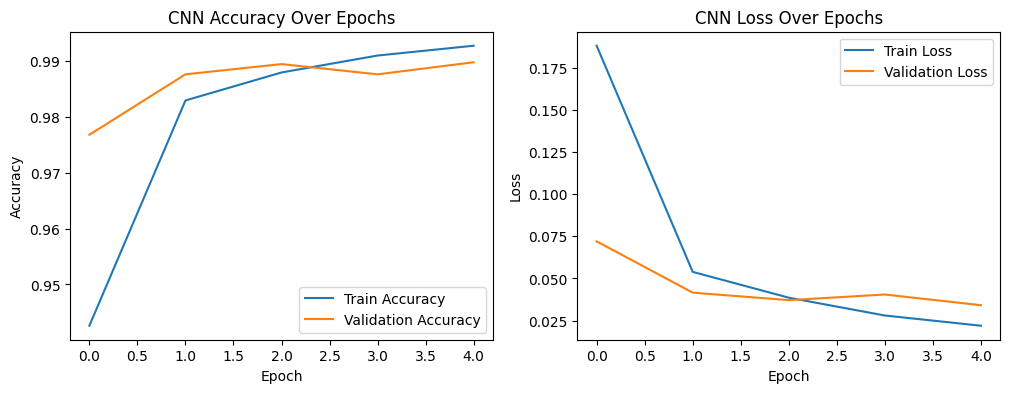

In [7]:
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(train.history["accuracy"], label="Train Accuracy")
plt.plot(train.history["val_accuracy"], label="Validation Accuracy")
plt.title("CNN Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
# Loss
plt.subplot(1,2,2)
plt.plot(train.history["loss"], label="Train Loss")
plt.plot(train.history["val_loss"], label="Validation Loss")
plt.title("CNN Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


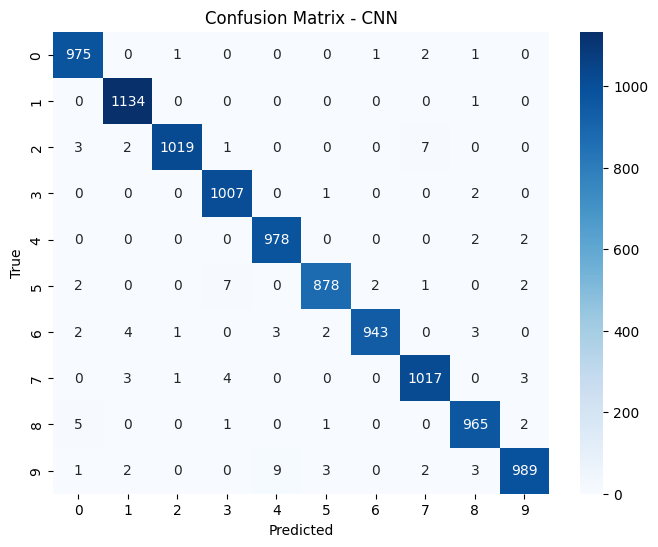

In [8]:
y_pred_cnn = np.argmax(model.predict(X_test_cnn), axis=1)

cm_cnn = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(8,6))
sns.heatmap(cm_cnn, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - CNN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Model Comparison:
Logistic Regression: 0.9263
CNN: 0.9905


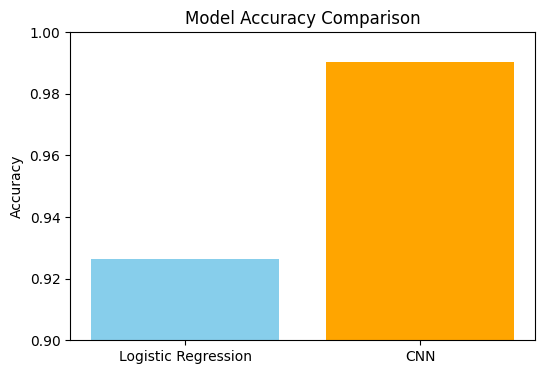

In [9]:
# Collect results
results = {
    "Logistic Regression": acc,
    "CNN": test_acc
}

print("Model Comparison:")
for model_name, score in results.items():
    print(f"{model_name}: {score:.4f}")
plt.figure(figsize=(6,4))
plt.bar(results.keys(), results.values(), color=["skyblue","orange"])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0.9, 1.0)  # zoom in to see difference
plt.show()

## Ethics & Reflection

- AI models can make mistakes due to noisy input (poor handwriting, smudges), biases in training data, or limitations in model generalization.

- Risks in real-world use: Misclassification in postal services may lead to lost mail; in banking, wrong digit recognition could cause financial errors.

- Fairness and reliability: Deployment should include thorough testing across diverse handwriting styles to avoid disadvantaging certain groups.

- Responsibility: Human oversight and error-handling mechanisms should always be in place when ML is applied to critical real-world tasks.